<a href="https://colab.research.google.com/github/victoriousvictor42/hass-consult/blob/master/Escada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


> Come up with factors that affect housing prices so that we can make a prediction of house prices



### b) Defining the Metric for Success



*   Do Multiple Linear Regression
*   Do Quantile Regression
*   Do Ridge Regression
*   Do Lasso Regression
*   Do Elastic Net Regression






### c) Understanding the context 

Hass consulting Company want to build new houses. They want to come up with prices that are reasonable so as to attract more customers and at the same time make profit. At the end it becomes a win win situation for both parties.

### d) Recording the Experimental Design



 

*   Data Cleaning
*   Feature Engineering
*   Multilinear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net






### e) Data Relevance

the data we have is from Hass Consulting Company. they have been collecting it since they started building houses. therefore, it is very relevant since the data is like property.

## 2. Reading the Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# loading the dataset
escada = pd.read_csv('Independent Project Week 7 - house_data.csv')

## 3. Checking the Data

In [22]:
escada.shape

(21613, 20)

there are 21613 rows and 20 columns

In [23]:
escada.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
escada.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [25]:
escada.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [26]:
escada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


The data we have is all numerical, that is, 20 numerical data.

In [27]:
escada.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

the above data types coresspond with the data actual values of the dataframe

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

the above dataset seems to be right since the actual variables are the one that are normally make house prices to vary. for example, a house with pne floor is less expensive compared to the one with two floors and so on. Also, the data set has 21,613 data points. They are enough to come up with actual predictions of the house prices. 

## 5. Tidying the Dataset

The data is very intresting. but we would like to check the following columns so as to assess the content to know really whether they would really affect the price of the houses. These are the columns:-


*   Waterfront
*   View
*   sqft_basement
*   yr_renovated



In [28]:
escada.waterfront.unique()

array([0, 1])

In [29]:
escada.view.unique()

array([0, 3, 4, 2, 1])

In [30]:
escada.sqft_basement.unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960, 1100,  280,  870,  460,
       1400, 1320,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,
        350,  935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,
        340,  470,  370,  140, 1760,  130,  610,  520,  890, 1110,  150,
       1720,  810,  190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,
        310,  930, 1390, 1830, 1300,  510, 1330, 1590,  920, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

In [31]:
escada.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

these above columns had 0 values as we were previewing the head and tail of the dataset. After seeing their unique values, we came to a descision not to drop them since they have substancial data that can affect the pricing of the house. We have to drop the id column since it is not relevant in determining the house prices.

In [0]:
escada.drop(columns='id', inplace=True)

In [33]:
escada.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Again we are going to drop the following columns soince the dont serve us with relevant data. The columns are:-



*   Condition
*   sqft_above
*   sqft_living15
*   sqft_lot15
*   latitude
*   Longitude


In [0]:
escada.drop(['sqft_living15','sqft_lot15','lat', 'long', 'condition', 'sqft_above'],axis=1 ,inplace=True)

In [35]:
# Identifying the Missing Data
#
escada.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

there are no missing values in the dataset


In [36]:
# checking for duplicates
escada.duplicated().sum()

8

there are 8 duplicates in the dataset

In [0]:
# dealing with duplicates
escada.drop_duplicates(inplace = True)

In [38]:
# ensuring the duplicated have been dropped
escada.duplicated().sum()

0

the duplicates have been successfully been dropped.

Text(0.5, 1.0, 'Price (Outliers)')

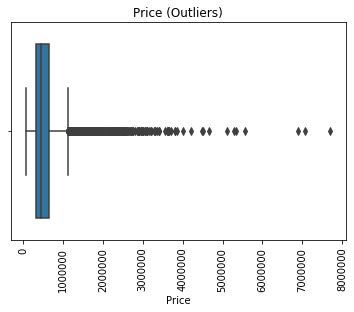

In [39]:
# checking for outliers
ax = sns.boxplot(x = 'price', data=escada)
plt.xticks(rotation = 90)
plt.xlabel('Price')
plt.title('Price (Outliers)')

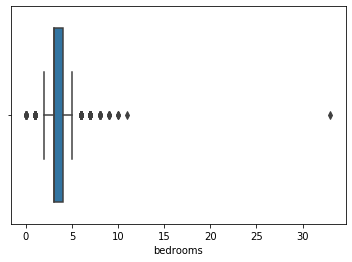

In [40]:
ax = sns.boxplot(x = 'bedrooms', data=escada)

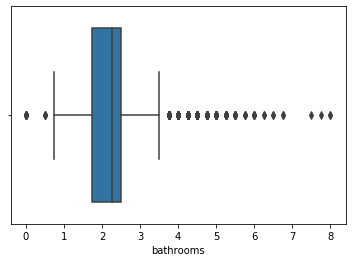

In [41]:
ax = sns.boxplot(x='bathrooms', data=escada)

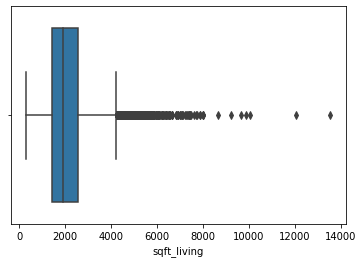

In [42]:
ax = sns.boxplot(x='sqft_living', data=escada)

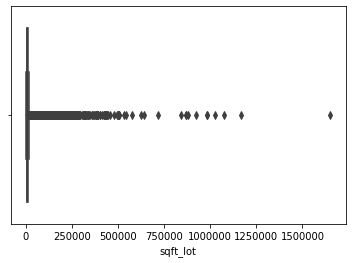

In [43]:
ax = sns.boxplot(x='sqft_lot', data=escada)

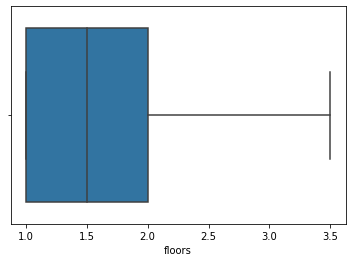

In [44]:
ax = sns.boxplot(x='floors', data=escada)

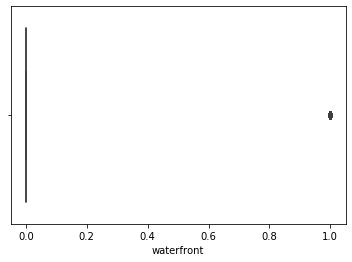

In [45]:
ax = sns.boxplot(x='waterfront', data=escada)

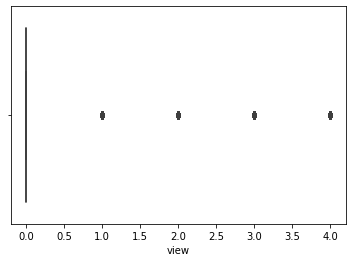

In [46]:
ax = sns.boxplot(x='view', data=escada)

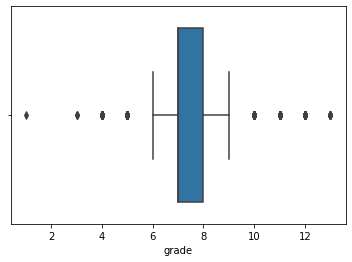

In [47]:
ax = sns.boxplot(x='grade', data=escada)

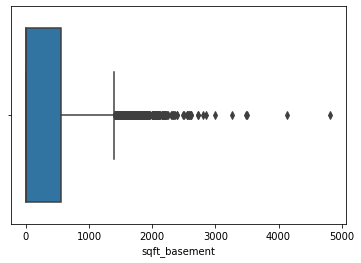

In [48]:
ax = sns.boxplot(x='sqft_basement', data=escada)

In [49]:
escada.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

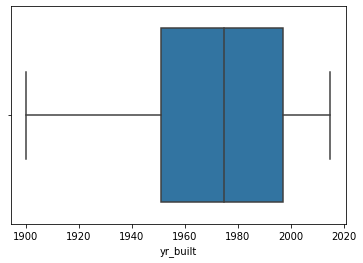

In [50]:
ax = sns.boxplot(x='yr_built', data=escada)

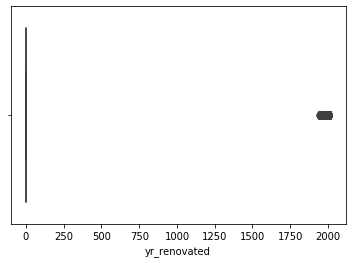

In [51]:
ax = sns.boxplot(x='yr_renovated', data=escada)

There is no need to remove the outliers.

## 6. Exploratory Analysis

In [52]:
escada.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,6,0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,910,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,0,1987,0,98074


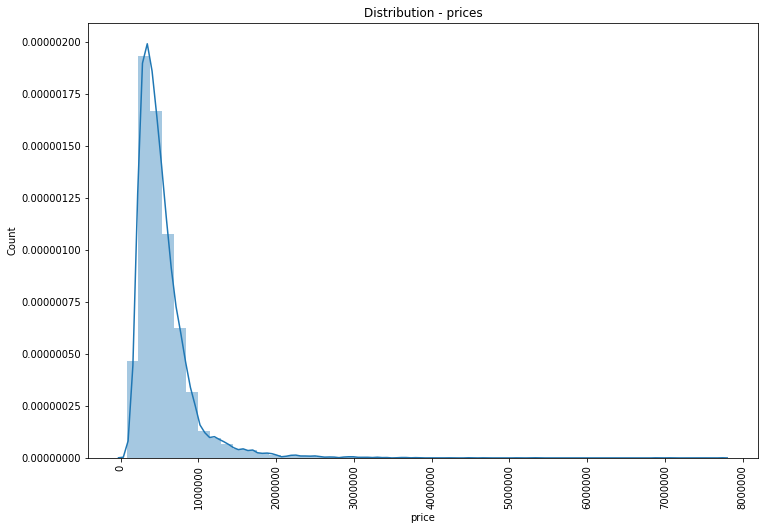

In [53]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.price, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - prices')
plt.ylabel('Count')

plt.show()

We observe that most of the prices of the houses Hass built ranges from 0 to 2,000,000

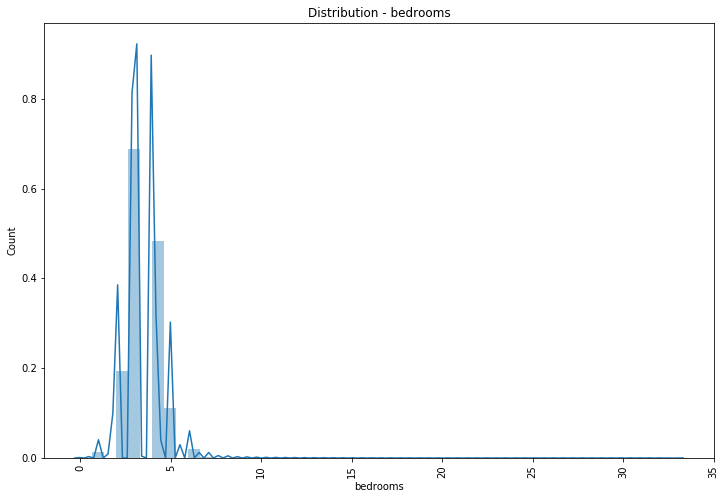

In [54]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.bedrooms, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - bedrooms')
plt.ylabel('Count')

plt.show()

The houses have bedrooms ranging from 1 to 5

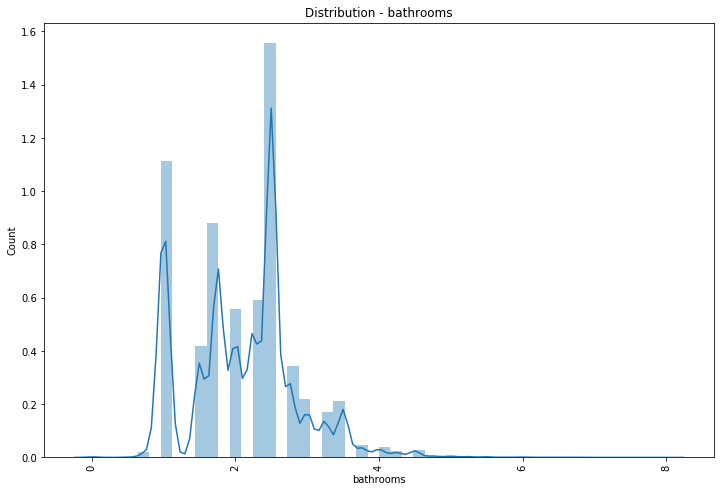

In [55]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.bathrooms, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - bathrooms')
plt.ylabel('Count')

plt.show()

The houses have bathrooms ranging from 1 to 4

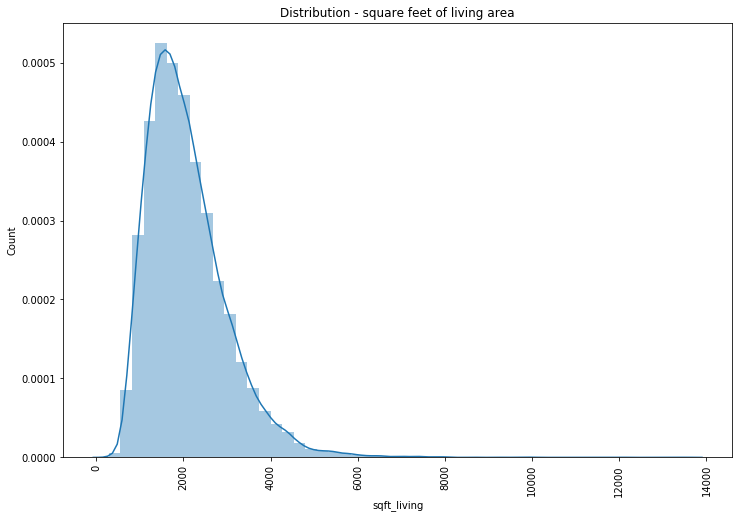

In [56]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.sqft_living, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - square feet of living area')
plt.ylabel('Count')

plt.show()

The square feet of the living area ranges from 500 to 5000 square feets

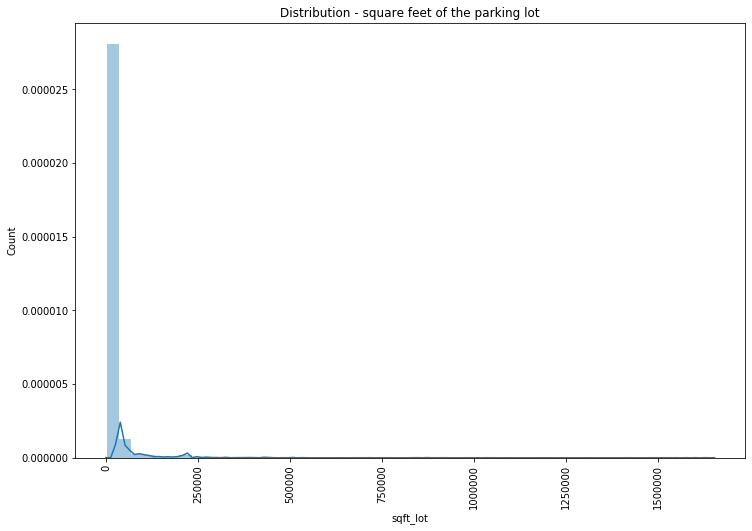

In [57]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.sqft_lot, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - square feet of the parking lot')
plt.ylabel('Count')

plt.show()

The square feet of the parking lot ranges from 0 to 1,500,000 square feets

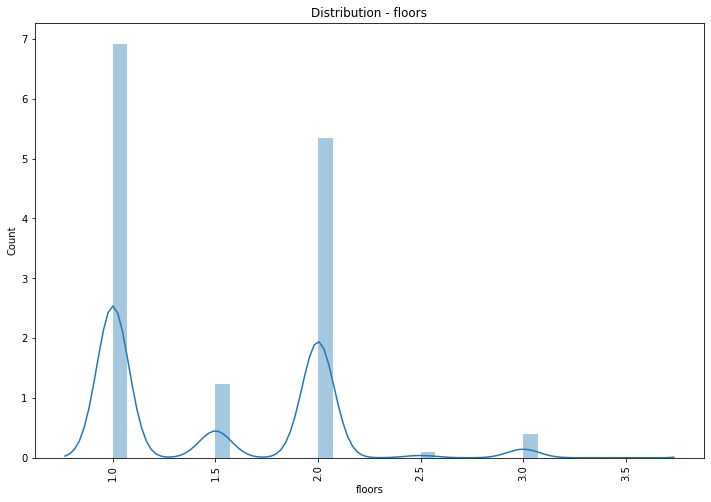

In [58]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.floors, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - floors')
plt.ylabel('Count')

plt.show()

Most of the houses have one floor

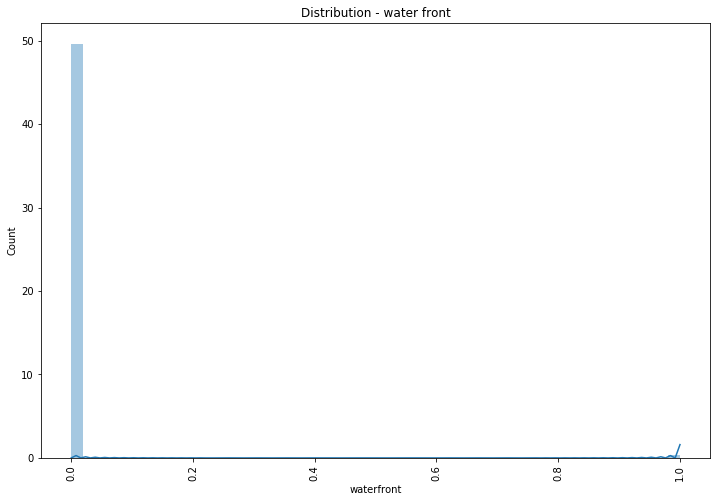

In [59]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.waterfront, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - water front')
plt.ylabel('Count')

plt.show()

MOst of the houses have no water fronts

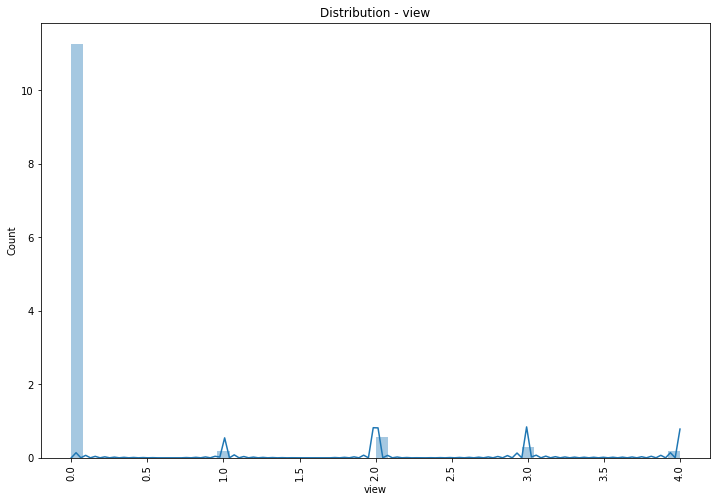

In [60]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.view, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - view')
plt.ylabel('Count')

plt.show()

Most of the houses have no views

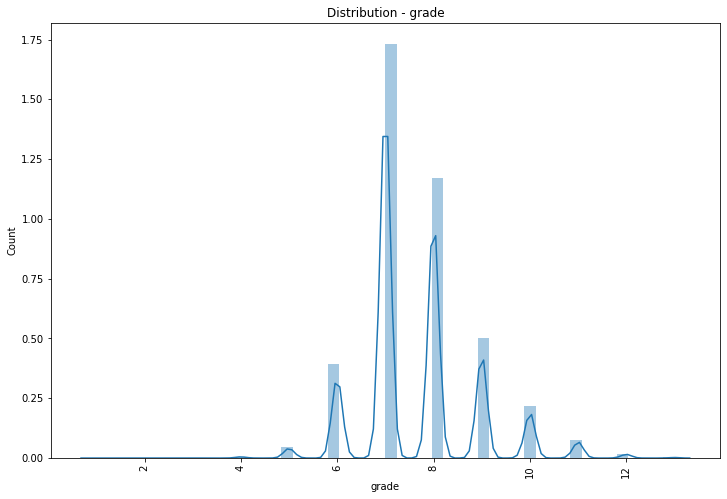

In [61]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.grade, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - grade')
plt.ylabel('Count')

plt.show()

Most of the houses are of grade 7

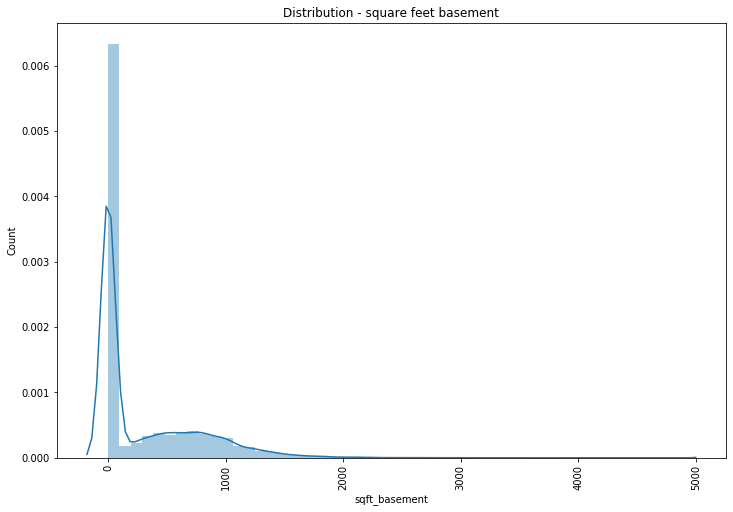

In [62]:
plt.figure(figsize=(12,8))

ax = sns.distplot(escada.sqft_basement, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - square feet basement')
plt.ylabel('Count')

plt.show()

Most of the houses have no basement

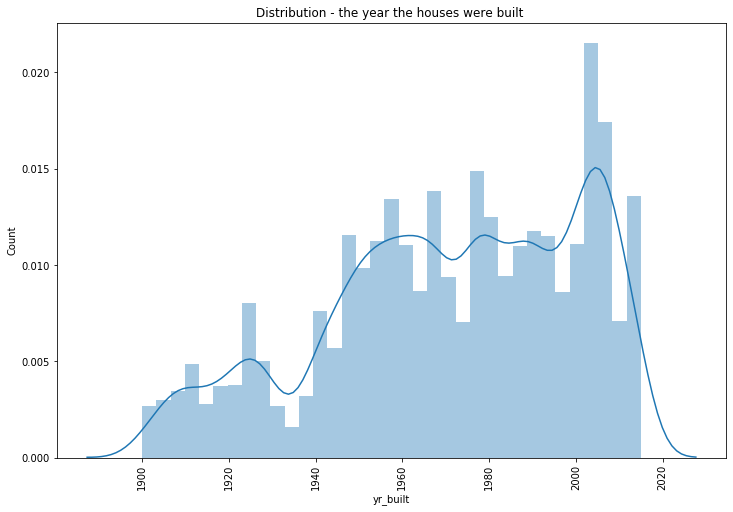

In [63]:
plt.figure(figsize=(12,8))

ax = sns.distplot(escada.yr_built, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - the year the houses were built ')
plt.ylabel('Count')

plt.show()

Most of the houses were built in the year 2000 to 2015

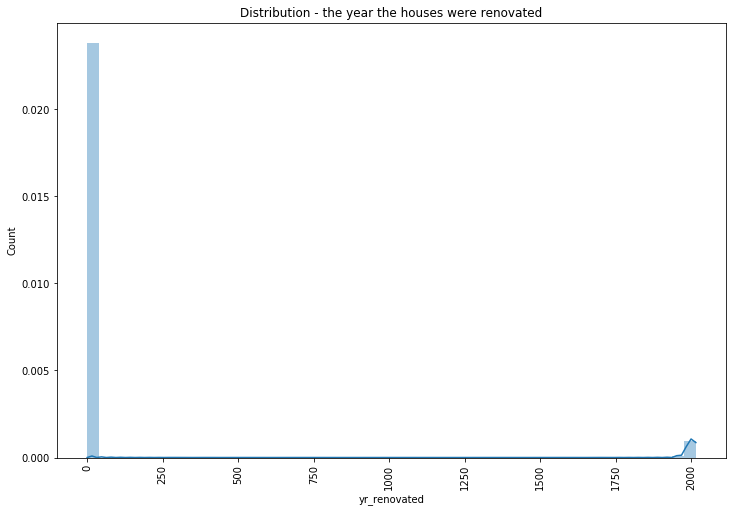

In [64]:
plt.figure(figsize=(12,8))

ax = sns.distplot(escada.yr_renovated, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - the year the houses were renovated')
plt.ylabel('Count')

plt.show()

Most of the houses have not been renovated yet

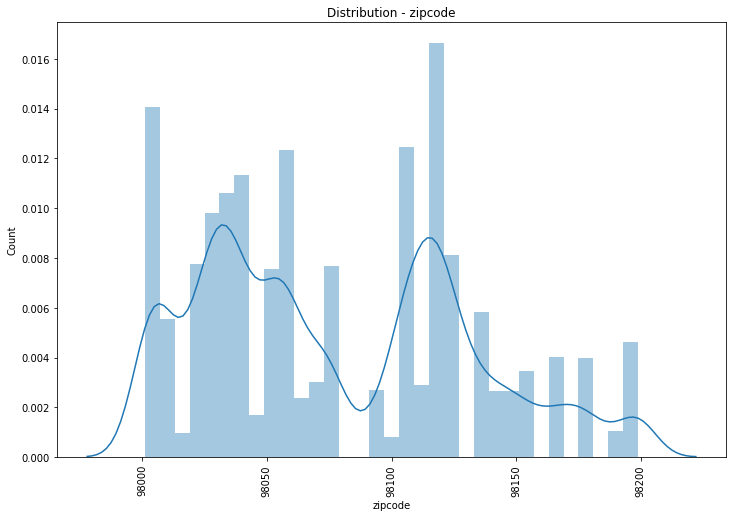

In [65]:
plt.figure(figsize=(12,8))
ax = sns.distplot(escada.zipcode, hist=True)
plt.xticks(rotation=90)
plt.title('Distribution - zipcode')
plt.ylabel('Count')

plt.show()

most houses were built between zipcode 98,110 to 98,130

**Bivariate Analysis**

We are going to make predictions of our prices of the houses. So we will need to compare the prices columns against all other columns so as to get their relationships
******************
First we will do a correlation to see how all of the columns relate to each other. We will achieve this by use of a heatmap

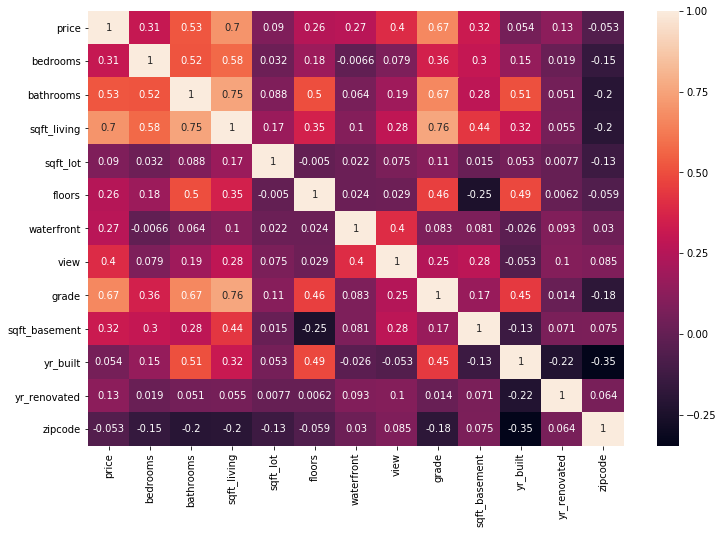

In [66]:
plt.figure(figsize=(12,8))
hass = escada.corr()
sns.heatmap(hass,
            xticklabels = hass.columns.values,
            yticklabels = hass.columns.values,
            annot=True)
plt.show()

We notice that price and bathrooms have a positive correlation. this means that if the number of bathrooms increases, the price will also increase.
*************
We also note that the price of the house and the square feet of the living area have a high correlation which means that if the square feet of the living area increases then, the price of the house will also increase
**************
also we notice that the price and zip code of the house have a low correlation which means that if the zip code doesnt necessarilty affect the price of the house

*Prices vs other columns*

In [67]:
escada.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

features with very low correlation should be dropped since there the relationship with the dependent variable is insignificance

In [0]:
ineza = escada.drop(['sqft_lot','floors','waterfront','yr_built',
       'yr_renovated', 'zipcode' ], axis = 1, inplace=True)


After now dropping, we can now check the relationships between the dependent variable and indepedent variable.

Prices vs features

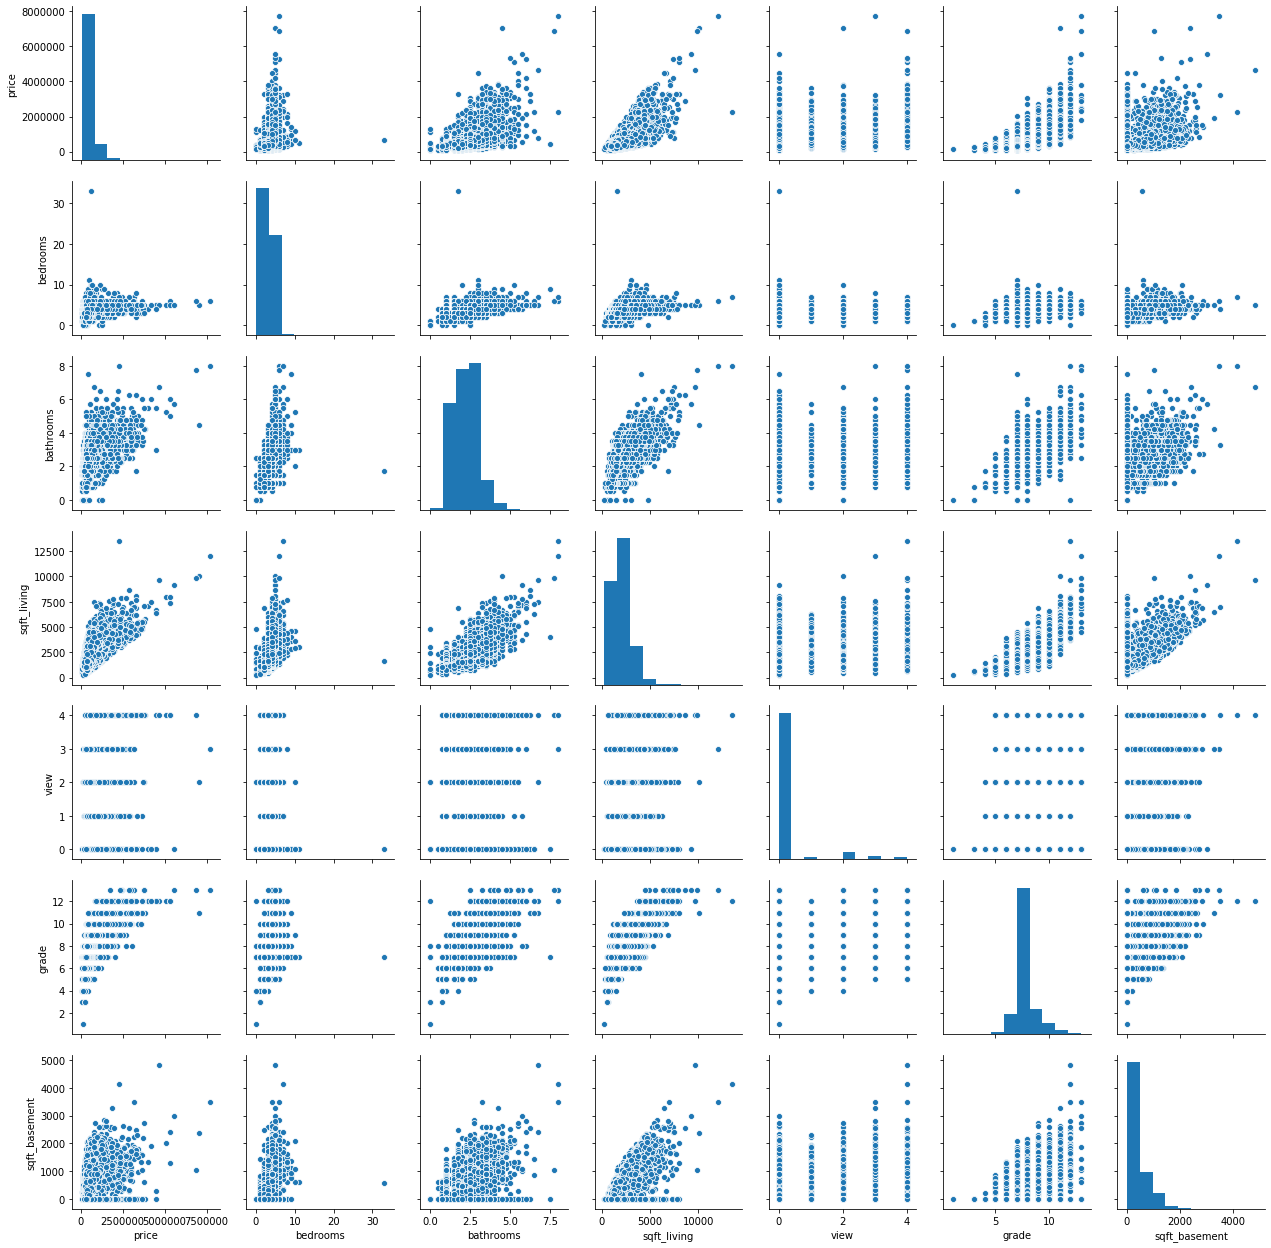

In [70]:
sns.pairplot(escada)

in the pairplot we see that the prices vs the features have a high correlation which is the data we wanted to work on from the beginning.
************************
Now, i am going to work on prices vs a feature so as to get intresting insights.

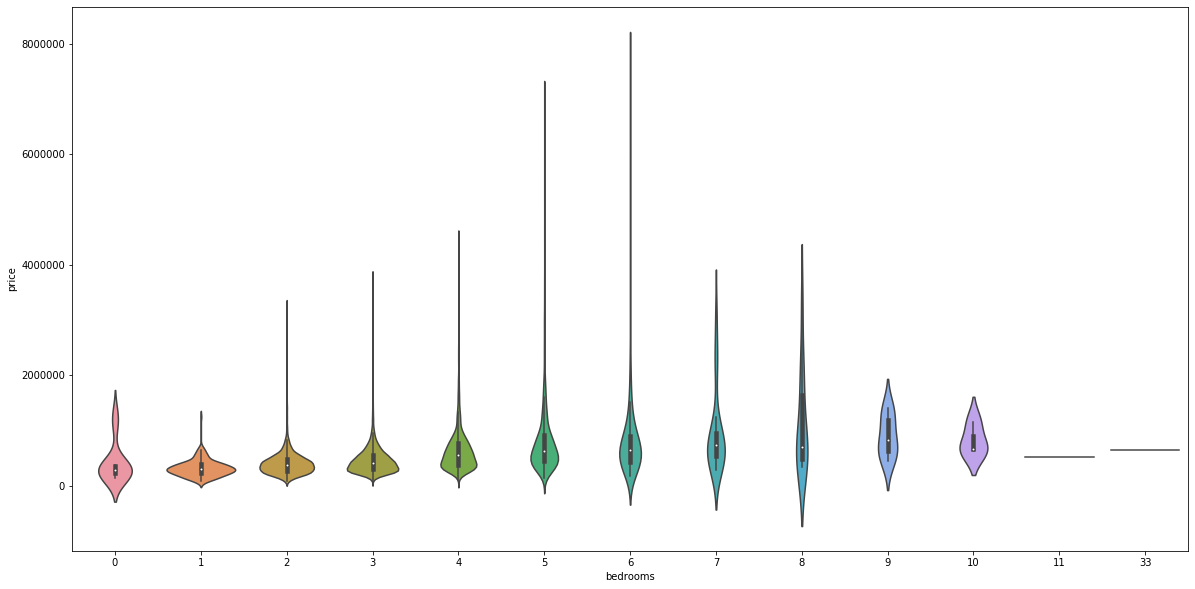

In [71]:
plt.figure(figsize = (20,10))
sns.violinplot(x='bedrooms', y='price', data=escada)
plt.show()

1 bedroom houses have a highest median and the density is around the median

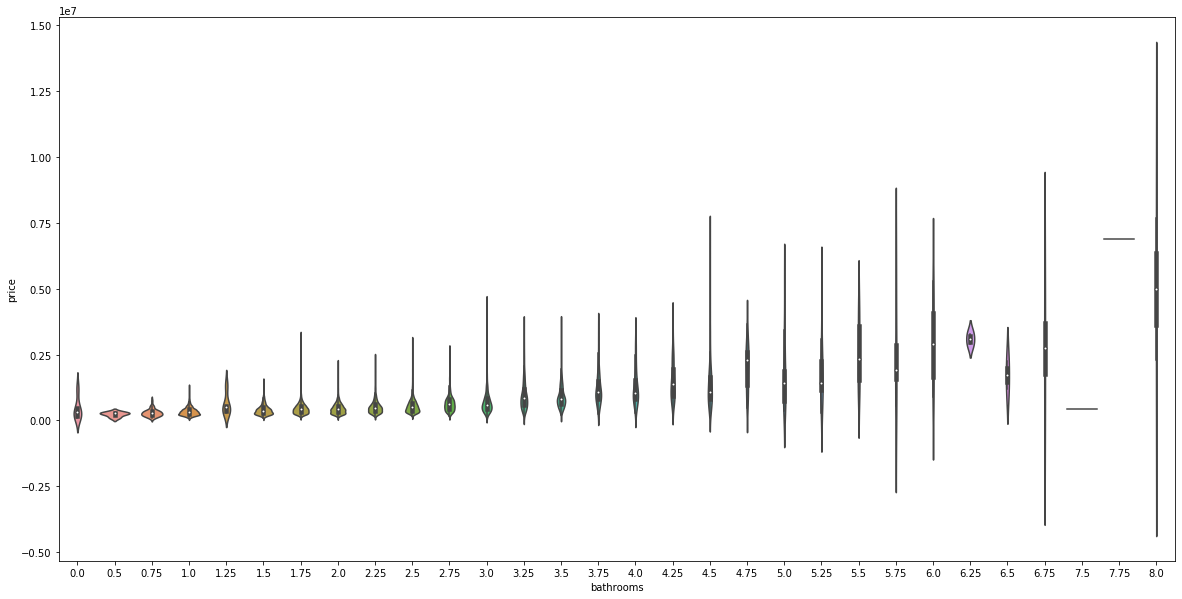

In [72]:
plt.figure(figsize = (20,10))
sns.violinplot(x='bathrooms', y='price', data=escada)
plt.show()

generally, houses with bathrooms clearly have an effect of the price of the house. the median is varying with the price of the house.

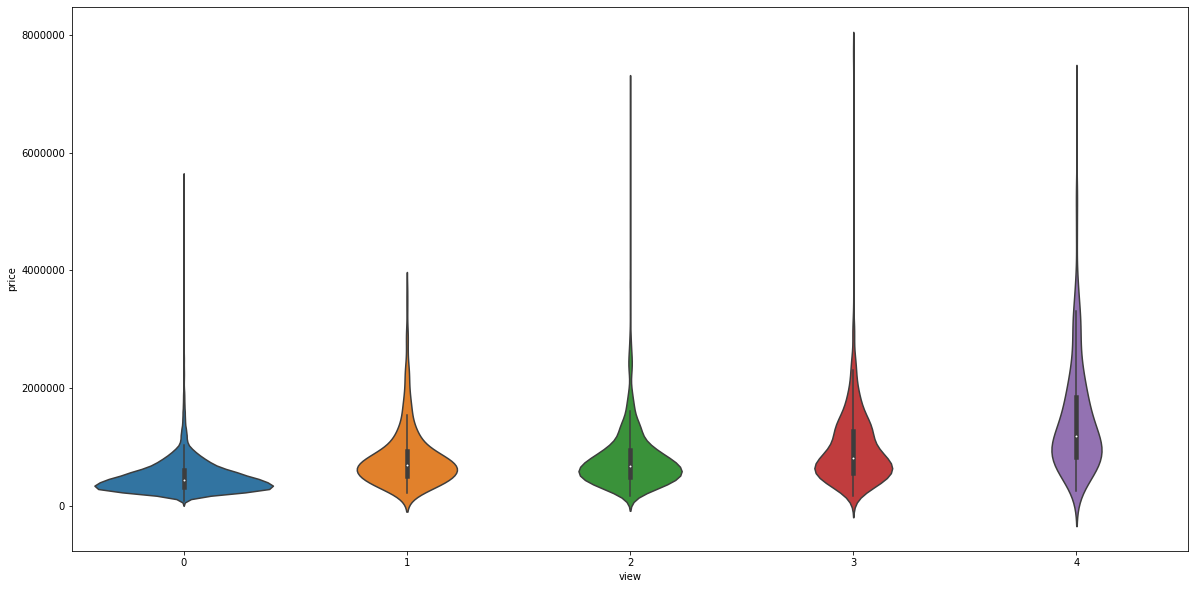

In [73]:
plt.figure(figsize = (20,10))
sns.violinplot(x='view', y='price', data=escada)
plt.show()

houses with no views seems to have more effect on price than house with views

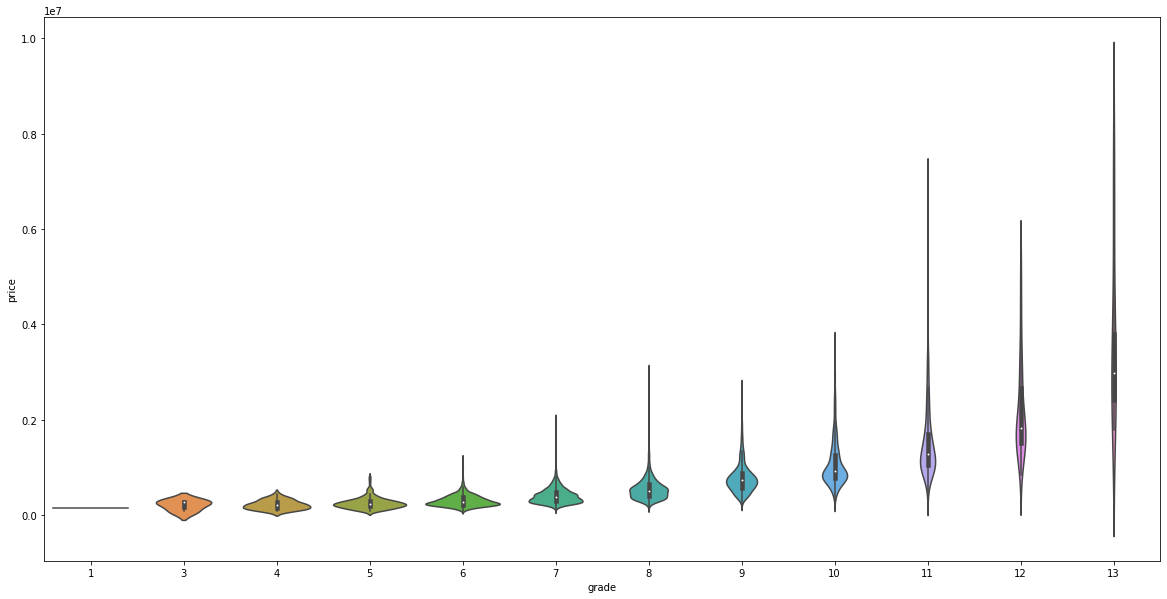

In [74]:
plt.figure(figsize = (20,10))
sns.violinplot(x='grade', y='price', data=escada)
plt.show()

the grade of the houses seems to have a role in the price of the house since the medians are clearly varying with the price

# Building the models

**Multiple Linear Regression**

the aim of this prediction is to get the price of the houses

In [0]:
# preparing the data
X = escada.iloc[:,1:]
y = escada.iloc[:,0]

# importing the module that is is neccessary for spliting data
from sklearn.model_selection import train_test_split
# splitting the data for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [77]:
# importing the module responsible for linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# training the data
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# making the predictions
y_pred = regressor.predict(X_test)

In [79]:
# getting the rmse
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

231567.99563410404

In [80]:
print(escada.price.max())
escada.price.min()

7700000.0


75000.0

Our data ranges from 7700000 to 75000. therefore a RMSE of 231567 is low

**Checking for multicollinearity**

In [81]:
# Dropping the price column so as to focus on features only
independent_only = escada.drop(columns=['price'])
correlations = independent_only.corr()

correlations

,bedrooms,bathrooms,sqft_living,view,grade,sqft_basement
bedrooms,1.000000,0.515965,0.576666,0.079432,0.357186,0.303178
bathrooms,0.515965,1.000000,0.754735,0.187904,0.665036,0.283823
sqft_living,0.576666,0.754735,1.000000,0.284621,0.762954,0.435078
view,0.079432,0.187904,0.284621,1.000000,0.251461,0.276993
grade,0.357186,0.665036,0.762954,0.251461,1.000000,0.168479
sqft_basement,0.303178,0.283823,0.435078,0.276993,0.168479,1.000000


Computing the VIF score

In [82]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_living,view,grade,sqft_basement
bedrooms,1.611612,-0.375980,-0.923348,0.137247,0.357569,-0.078424
bathrooms,-0.375980,2.526519,-1.256355,0.056986,-0.606768,0.029960
sqft_living,-0.923348,-1.256355,4.534484,-0.198739,-2.087691,-0.929553
view,0.137247,0.056986,-0.198739,1.152573,-0.181310,-0.260024
grade,0.357569,-0.606768,-2.087691,-0.181310,2.822072,0.546878
sqft_basement,-0.078424,0.029960,-0.929553,-0.260024,0.546878,1.399588


SQFT_LIVING has a vif score that is close to 5. we will have to drop it since it has the potential to cause problems

In [83]:
revised = independent_only.drop(columns=['sqft_living'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,bedrooms,bathrooms,view,grade,sqft_basement
bedrooms,1.423593,-0.631809,0.096779,-0.067544,-0.267707
bathrooms,-0.631809,2.178425,0.001922,-1.185198,-0.227588
view,0.096779,0.001922,1.143862,-0.272810,-0.300765
grade,-0.067544,-1.185198,-0.272810,1.860892,0.118909
sqft_basement,-0.267707,-0.227588,-0.300765,0.118909,1.209034


the vif score is close 0. this is acceptable. we can work on the data.

**Residual Plots**

In [84]:
X = revised.values
y = escada.price.values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-3470.4167870125375

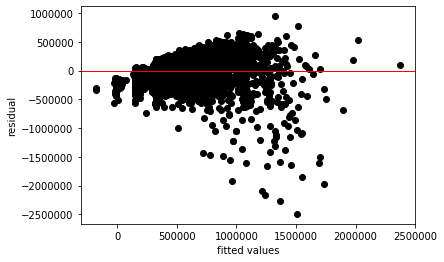

In [85]:
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

its not that bad since our residuals are centered around a mean that is close to 0. to be more precise, let's perform a heteroskedasticity test.

**Heteroskedascity Test**

we are going to use Bartlett's test. it will establish as a null hypothesis that the variance for all our datapoints are homogeneous and the alternative hypothesis is that the variances are unequal

In [90]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would means that the variance of the data is unequal

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


#Quantile Regression

In [169]:
escada.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_basement'],
      dtype='object')

price against square feet of living area

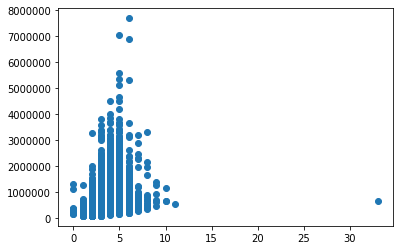

In [170]:
#preparing data
x = escada.iloc[:,1].values.reshape(-1,1)
y = escada.iloc[:,0].values
plt.scatter(x,y)

In [171]:
model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(x)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, y)))

Mean squared error: 122154678187.36
Variance score: 0.10


Text(0.5, 1.0, 'Linear regression')

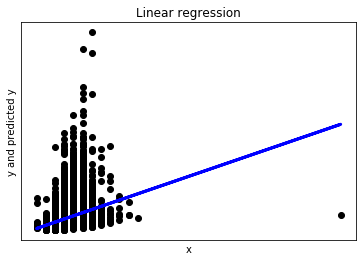

In [172]:
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred1, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression")


In [173]:
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', escada)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.04636
Model:                       QuantReg   Bandwidth:                   4.018e+04
Method:                 Least Squares   Sparsity:                    5.564e+05
Date:                Mon, 27 Jan 2020   No. Observations:                21605
Time:                        06:41:03   Df Residuals:                    21603
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7115.561     25.297      0.000    1.66e+05    1.94e+05
x             8.5e+04   2034.853     41.772      0.000     8.1e+04     8.9e+04


In [174]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0  0.1  119799.999998   40050.000001    37230.077244    42869.922758
1  0.2  134999.999998   50000.000001    47089.695759    52910.304242
2  0.3  149999.999953   61000.000009    57588.147876    64411.852143
3  0.4  165000.000001   72500.000000    68717.022157    76282.977843
4  0.5  179999.999994   85000.000002    81011.538070    88988.461933
5  0.6  188333.333330  101666.666667    96935.809955   106397.523380
6  0.7  189574.999998  122712.500001   117856.878168   127568.121834
7  0.8  191000.000002  151999.999999   145535.771208   158464.228790
8  0.9  150000.000001  215000.000000   203156.832872   226843.167128


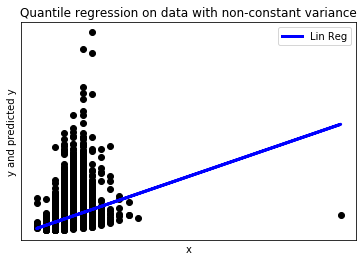

In [177]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred1, color='blue',
         linewidth=3, label='Lin Reg')



plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()


#Ridge Regression

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
X = escada.iloc[:,1:6]
y = escada.iloc[:,0]


In [151]:

# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (metrics.mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

56960159220.17977


In [0]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [153]:
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 


57143279549.17821

In [154]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

56970119410.05065


In [155]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,escada.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 200.41593407109394,
 'bedrooms': -21478.328584370272,
 'price': -30740.37786733859,
 'sqft_living': 93797.80291336746,
 'view': 91852.03284604798}

#Lasso Regression

In [0]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [0]:
# preparing data
X = escada.iloc[:,1:6]
y = escada.iloc[:,0]

In [0]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [159]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.578050852057337
lasso MSE: 56960159231.26009
lasso coef: [-28589.12967462 -16539.96680236 184085.96360998  71867.32261448
 107970.78916456]


In [160]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.5729391942566225
linear score: 0.5729342746180341
lasso MSE: 56802615986.34617
linear MSE: 56803270338.92961
lasso best estimator coef: [-27744.21972587 -18782.99351816 184098.71139455  72488.30336777
 109089.03493749]
linear coef: [-27783.46148222 -18877.72660775 184193.38207368  72499.96628224
 109114.32400191]


#Elastic Net

In [0]:
from sklearn.linear_model import ElasticNet

In [0]:
# preparing data
X = escada.iloc[:,1:6]
y = escada.iloc[:,0]

In [163]:
# Creating our linear regression model for the purpose of comparison
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

56960159220.17977


In [164]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': -21478.328584370272,
 'bedrooms': -30740.37786733859,
 'grade': 91852.03284604798,
 'sqft_living': 200.41593407109394,
 'view': 93797.80291336746}

In [0]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [166]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

57252026804.537766

In [167]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

94873190983.40912


In [168]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 28143.90200883696,
 'bedrooms': 11924.161261111221,
 'grade': 26241.3156966776,
 'sqft_living': 35.05853191546623,
 'view': 25314.41678962885}

# challenging the question

the rmse are very high in multilinear regression. Lowering the values has to be done.